#**The Impact of Temperature on Ice Cream Sales Profit**

Background project: Secara fakta biasanya temperature yang lebih tinggi maka profit yang didapat pada penjualan ice cream menjadi lebih tinggi.

Problem Statement: Seberapa kuat korelasi Temperature terhadap profit penjualan ice cream dan bagaimana prediksi untuk profit ice cream.

##Import Libraries

In [1]:
import warnings
warnings.simplefilter(action='ignore')

#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split
##Standarization
from sklearn.preprocessing import StandardScaler
## Model
from sklearn.linear_model import LinearRegression
## cross validation
from sklearn.model_selection import cross_val_score

## Performance Metrics
from sklearn import metrics
from sklearn.metrics import r2_score
%matplotlib inline

##Read Dataset

In [2]:
data = pd.read_csv("/content/Ice Cream Sales - temperatures.csv")

In [3]:
data

,Temperature,Ice Cream Profits
0,39,13.17
1,40,11.88
2,41,18.82
3,42,18.65
4,43,17.02
...,...,...
360,99,85.13
361,99,87.08
362,99,89.29
363,101,81.91


Terdapat 365 data yang terdiri dari dua variabel yaitu temperature (Fahrenheit) dan ice cream profit (US Dollar)

##Data Understanding dan Eksplorasi Data Analysis

####Cek missing value dan tipe data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Temperature        365 non-null    int64  
 1   Ice Cream Profits  365 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 5.8 KB


####Pada keterangan non-null mengindikasikan bahwa tidak terdapat missing value pada dataset. Kemudian untuk variabel temperature memiliki tipe data numerik, sedangkan ice cream profit memiliki tipe data kategorik

#####Deskripsi Statistik Data

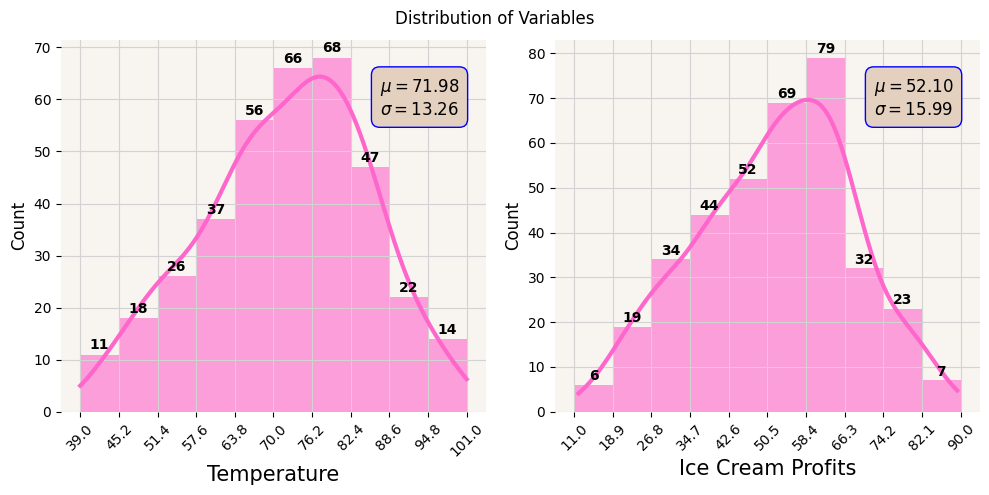

In [ ]:
# Set up the subplot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Loop to plot histograms for each continuous feature
for i, col in enumerate(data.columns):

    values, bin_edges = np.histogram(data[col],
                                     range=(np.floor(data[col].min()), np.ceil(data[col].max())))

    graph = sns.histplot(data=data, x=col, bins=bin_edges, kde=True, ax=ax[i],
                         edgecolor='none', color='#FF66CC', alpha=0.6, line_kws={'lw': 3})
    ax[i].set_xlabel(col, fontsize=15)
    ax[i].set_ylabel('Count', fontsize=12)
    ax[i].set_xticks(np.round(bin_edges, 1))
    ax[i].set_xticklabels(ax[i].get_xticks(), rotation=45)
    ax[i].grid(color='lightgrey')

    ax[i].set_facecolor('#f8f4f0')

    for j, p in enumerate(graph.patches):
        ax[i].annotate('{}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                       ha='center', fontsize=10, fontweight="bold")

    textstr = '\n'.join((
        r'$\mu=%.2f$' % data[col].mean(),
        r'$\sigma=%.2f$' % data[col].std()
    ))
    ax[i].text(0.75, 0.9, textstr, transform=ax[i].transAxes, fontsize=12, verticalalignment='top',
               color='black', bbox=dict(boxstyle='round', facecolor='#e3d0bf', edgecolor='blue', pad=0.5))

    # Remove outer border kde plor
    for spine in ax[i].spines.values():
        spine.set_visible(False)

plt.suptitle('Distribution of Variables', fontsize=12)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

In [5]:
###Summary statistic
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,365.0,71.980822,13.258510,39.00,63.00,73.00,82.00,101.00
Ice Cream Profits,365.0,52.103616,15.989004,11.88,40.65,53.62,63.63,89.29


Ringkasan statistik pada masing-masing variabel:
*   Dataset yang terdiri dari 365 observasi dengan ukuran temperatur minimum
sebesar 39 derajat Farenheit dan maksimum 101 derajat Farenheit  memiliki rata-rata  temperatur sebesar 71,98 derajat Farenheit, dengan standar deviasi sebesar 13,26 derajat Farenheit.
Interquatile (IQR) pada temperature mengindikasikan bahwa 50% temperature berada antara 63 derajat Farenheit dan 82 derajat Farenheit
*   Dataset yang terdiri dari 365 observasi pada ice cream profit dengan profit minimum sebesar 11,88 dan profit maksimum sebesar 82,29 memiliki rata-rata profit sebesar 52,1 , dengan standar deviasi sebesar 15,99.
Interquatile (IQR) pada ice cream profit mengindikasikan bahwa 50% temperature berada antara 40,65 dan 63,63.




#####Korelasi data

Text(0.5, 1.0, 'Correlation temperature and ice cream profit')

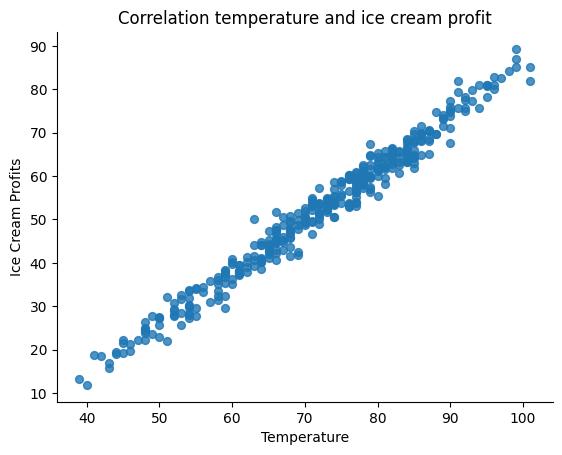

In [8]:
#Correlation Temperature againts Ice Cream Profits

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='Temperature', y='Ice Cream Profits', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title("Correlation temperature and ice cream profit")

In [6]:
data.corr()

,Temperature,Ice Cream Profits
Temperature,1.000000,0.988446
Ice Cream Profits,0.988446,1.000000


Nilai korelasi temperature terhadap profit es krim sebesar 0,988446 yang berarti bahwa temperature berkorelasi sangat kuat dengan profit es krim, sehingga dapat disimpulkan bahwa semakin tinggi temperature menunjukkan bahwa semakin tinggi pula profit es krim

##Data Preparation

####Splitting dataset

In [13]:
##Train and test splitiing
x = data.drop('Ice Cream Profits',axis=1)
y = data['Ice Cream Profits']

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Dataset dibagi menjadi 80% training dan 20% testing.

In [11]:
# # creating a copy for future reference
# xtrain = x_train.copy()

####Standarisasi

In [15]:
scaler= StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

####Model Linear Regresssion

In [16]:
CV = []
R2_train = []
R2_test = []


def pred_model(model,model_name):
    # Training model
    model.fit(x_train,y_train)

    # R2 score of train set
    y_pred_train = model.predict(x_train)
    R2_train_model = r2_score(y_train,y_pred_train)
    R2_train.append(round(R2_train_model,4))

    # R2 score of test set
    y_pred_test = model.predict(x_test)
    R2_test_model = r2_score(y_test,y_pred_test)
    R2_test.append(round(R2_test_model,4))

    SSE = sum((y_test - y_pred_test) ** 2)
    MAE = metrics.mean_absolute_error(y_test,y_pred_test )
    MSE = metrics.mean_squared_error(y_test,y_pred_test )
    RMSE = np.sqrt(MSE)

    print(' SSE:', SSE, '\n', 'MAE:', MAE, '\n', 'MSE:', MSE, '\n', 'RMSE:', RMSE,'\n')

    # R2 mean of train set using Cross validation
    cross_val = cross_val_score(model ,x_train ,y_train ,cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean,4))

    # Printing results
    print("Train R2-score :",round(R2_train_model,4))
    print("Test R2-score :",round(R2_test_model,4))
    print("Train CV scores :",cross_val)
    print("Train CV mean :",round(cv_mean,4))

    score=r2_score(y_test,y_pred_test)
    print("Adjusted R squared : ",round(1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1),4))

    # Plotting Graphs
    # Residual Plot of train data
    fig, ax = plt.subplots(1,2,figsize = (10,4))
    residuals = y_test-y_pred_test
    ax[0].set_title(f'Distribution of Residuals ({model_name})')
    sns.distplot(residuals,hist = False,ax = ax[0])
    ax[0].set_xlabel('Residuals')

    # Y_test vs Y_train scatter plot
    ax[1].set_title('Actual vs Predicted')
    ax[1].scatter(x = y_test, y = y_pred_test)
    ax[1].set_xlabel('Actual')
    ax[1].set_ylabel('Predicted')

    plt.show()

In [17]:
regression = LinearRegression()

 SSE: 386.4766577489288 
 MAE: 1.8485293149506417 
 MSE: 5.294200791081216 
 RMSE: 2.3009130342281985 

Train R2-score : 0.9747
Test R2-score : 0.9836
Train CV scores : [0.98352703 0.97319207 0.97155016 0.96945114 0.97171043]
Train CV mean : 0.9739
Adjusted R squared :  0.9834


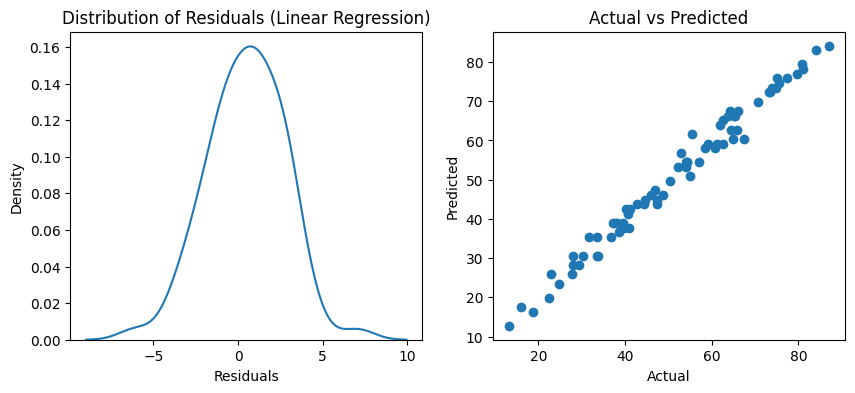

In [18]:
pred_model(regression,"Linear Regression")

####Nilai cross validation 97,47% yang menunjukkan bahwa regresi bekerja baik dan dapat menggeneralisasi secara efektif untuk data

*   Nilai SSE sebesar 386,47 , dimana SSE menunjukkan total kesalahan kuadrat antara prediksi dengan nilai aktual
*   Nilai MAE sebesar 1,84 , dimana MAE menunjukkan besarnya rata-rata kesalahan prediksi
*   Nilai MSE sebesara 5,29 , dimana MSE menunjukkan rata-rata kesalahan kuadrat
*   Nilai RMSE sebesar 28,37 , dimana RMSE menunjukkan akar kuadrat MSE yaitu besarnya rata-rata kesalahan prediksi

Nilai R2 sebesar 0,98 yang berarti bahwa sekitar 98% dari varians dalam variabel terget dijelaskan oleh variabel independen yang termasuk dalam model
Nilai R-squared sebesar 0,98 menjelaskan bahwa jumlah prediksi dalam model dan menunjukkan tingkat kekuatan penjelas yang tinggi

Nilai yang tinggi dalam model regresi menangkap sebagian besar variabilitas dalam variabel target dan membuat prediksi yang akurat

Secara kesuluruhan model ini sangat efektif dalam menjelaskan hubungan antara variabel indipenden dengan variabel dependen.






* SSE 386.48 menunjukkan total kesalahan kuadrat antara prediksi dengan nilai aktual, yang berarti bahwa model memiliki performa yang agak baik dalam memprediksi nilai aktual. Namun, interpretasi yang lebih akurat membutuhkan pertimbangan skala data, metrik lain, dan perbandingan dengan model baseline.

* MAE 1.85 menunjukkan besarnya rata-rata kesalahan prediksi, yang berarti bahwa model memiliki performa yang cukup baik dalam memprediksi nilai aktual.

* MSE sebesar 5.29, dimana MSE menunjukkan rata-rata kesalahan kuadrat, yang berarti bahwa model memiliki performa yang cukup baik dalam memprediksi nilai aktual.

*  Nilai RMSE 2.30,dimana RMSE menunjukkan akar kuadrat MSE yaitu besarnya rata-rata kesalahan prediksi, yang berarti bahwa model memiliki performa yang cukup baik dalam memprediksi nilai aktual.

* Nilai R-squared sebesar 0,98 menjelaskan bahwa jumlah prediksi dalam model dan menunjukkan tingkat kekuatan penjelas yang tinggi




#####Nilai koefisien

In [19]:
coeff_data = pd.DataFrame(regression.coef_,xtrain.columns,columns=['Coefficient'])
coeff_data

,Coefficient
Temperature,15.222387


#####Untuk setiap kenaikan suhu satu derajat Fahrenheit, terdapat kenaikan sekitar 15 unit dalam Keuntungan Es Krim. Hal ini menunjukkan hubungan linier positif antara suhu dan Keuntungan Es Krim.

#Kesimpulan

Secara kesuluruhan model regresi menangkap sebagian besar variabilitas dalam variabel target dan membuat prediksi yang akurat, sehingga dapat disimpulkan bahwa model regresisangat efektif dalam menjelaskan hubungan antara variabel indipenden dengan variabel dependen.